<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the IMDB dataset to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Extract the dataset
!tar zxf aclImdb_v1.tar.gz
# Remove aclImdb/train/unsup because it has no labels
!rm -rf aclImdb/train/unsup
# Display the description of the IMDB dataset
!cat aclImdb/README


--2025-10-28 10:54:10--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  24.1MB/s    in 3.9s    

2025-10-28 10:54:14 (20.6 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [3]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# Display the mapping of labels 0 and 1
print(train_review.target_names)

['neg', 'pos']


In [4]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [5]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

mini_dataset = [
    "This movie is very good.",
    "This film is a good",
    "Very bad. Very, very bad."
]

vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = vectorizer.fit_transform(mini_dataset).toarray()

# Combine into a DataFrame
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
display(df)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [8]:
# Specify the range of n-grams to use with ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = vectorizer.fit_transform(mini_dataset).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [9]:
import re
import pandas as pd

# Step 1: Sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Step 2: Preprocessing (lowercase + remove punctuation)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

preprocessed_sentences = [preprocess(s) for s in sentences]

# Step 3: Function to generate n-grams
def ngrams(tokens, n):
    return [' '.join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Step 4: Tokenize sentences
tokenized_1grams = [s.split() for s in preprocessed_sentences]
tokenized_2grams = [ngrams(s.split(), 2) for s in preprocessed_sentences]

# Step 5: Build vocabularies
vocab_1gram = sorted(set(word for sent in tokenized_1grams for word in sent))
vocab_2gram = sorted(set(word for sent in tokenized_2grams for word in sent))

# Step 6: Function to count words (BoW)
def bow_vector(tokens, vocab):
    return [tokens.count(word) for word in vocab]

# Step 7: Create BoW tables
bow_1gram = [bow_vector(sent, vocab_1gram) for sent in tokenized_1grams]
bow_2gram = [bow_vector(sent, vocab_2gram) for sent in tokenized_2grams]

# Step 8: Convert to DataFrames and display
df_1gram = pd.DataFrame(bow_1gram, columns=vocab_1gram)
df_2gram = pd.DataFrame(bow_2gram, columns=vocab_2gram)

print("1-gram BoW:")
display(df_1gram)

print("2-gram BoW:")
display(df_2gram)


1-gram BoW:


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


2-gram BoW:


,a movie,best movie,ever this,i never,is soooo,movie ever,movie i,movie is,soooo funny,this movie,what a
0,0,0,0,0,1,0,0,1,1,1,0
1,1,0,0,1,0,0,1,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,0


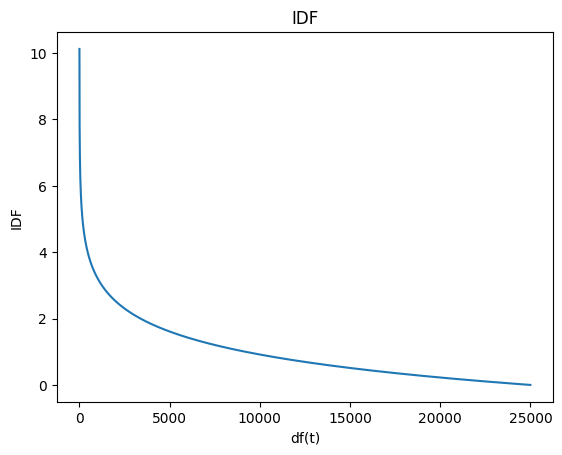

In [10]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [13]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = vectorizer.fit_transform(mini_dataset).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)


,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [14]:
# Download stop words if using for the first time
import nltk
stop_words = nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))  # 'i', 'me', 'my', ...

stop word : ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "s

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features=5)
bow_train = vectorizer.fit_transform(mini_dataset).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names_out())
display(df)

,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)

x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

print("TF-IDF matrix shape (train):", x_train_tfidf.shape)
print("TF-IDF matrix shape (test):", x_test_tfidf.shape)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF matrix shape (train): (25000, 5000)
TF-IDF matrix shape (test): (25000, 5000)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

clf = LogisticRegression(max_iter=200)
clf.fit(x_train_tfidf, y_train)

y_pred = clf.predict(x_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=train_review.target_names))


Test Accuracy: 0.88104
              precision    recall  f1-score   support

         neg       0.88      0.88      0.88     12500
         pos       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [18]:
import re
import math
import pandas as pd

sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

preprocessed = [preprocess(s) for s in sentences]
tokenized = [s.split() for s in preprocessed]

# Build vocabulary
vocab = sorted(set(word for sent in tokenized for word in sent))

# Count term frequency (TF)
def term_frequency(tokens, vocab):
    return [tokens.count(word) for word in vocab]

# Count document frequency (DF)
df_count = {}
for word in vocab:
    df_count[word] = sum(1 for sent in tokenized if word in sent)

N = len(tokenized)

# Standard TF-IDF formula
tfidf_standard = []
for tokens in tokenized:
    tf = term_frequency(tokens, vocab)
    tfidf = [tf[i] * math.log(N / df_count[vocab[i]]) for i in range(len(vocab))]
    tfidf_standard.append(tfidf)

df_standard = pd.DataFrame(tfidf_standard, columns=vocab)
print("TF-IDF (standard formula):")
display(df_standard)

# Scikit-learn TF-IDF formula
tfidf_sklearn = []
for tokens in tokenized:
    tf = term_frequency(tokens, vocab)
    tfidf = [tf[i] * math.log((1 + N) / (1 + df_count[vocab[i]])) + 1 for i in range(len(vocab))]
    tfidf_sklearn.append(tfidf)

df_sklearn = pd.DataFrame(tfidf_sklearn, columns=vocab)
print("TF-IDF (scikit-learn formula):")
display(df_sklearn)


TF-IDF (standard formula):


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0.000000,0.000000,0.000000,1.098612,0.000000,1.098612,0.0,0.000000,1.098612,0.405465,0.000000
1,1.098612,0.000000,0.000000,0.000000,1.098612,0.000000,0.0,1.098612,0.000000,0.000000,1.098612
2,0.000000,1.098612,1.098612,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.405465,0.000000


TF-IDF (scikit-learn formula):


,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,1.000000,1.000000,1.000000,1.693147,1.000000,1.693147,1.0,1.000000,1.693147,1.287682,1.000000
1,1.693147,1.000000,1.000000,1.000000,1.693147,1.000000,1.0,1.693147,1.000000,1.000000,1.693147
2,1.000000,1.693147,1.693147,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.287682,1.000000


In [21]:
!pip install gensim



In [23]:
from gensim.models import Word2Vec

sentences = [['this', 'movie', 'is', 'very', 'good'],
             ['this', 'film', 'is', 'a', 'good'],
             ['very', 'bad', 'very', 'very', 'bad']]

model = Word2Vec(sentences, vector_size=10, min_count=1, epochs=100)

print("Vocabulary list: {}".format(list(model.wv.index_to_key)))

for vocab in model.wv.index_to_key:
    print("Vector for {}: \n{}".format(vocab, model.wv[vocab]))


Vocabulary list: ['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
Vector for very: 
[-0.0053973   0.00255087  0.05143754  0.0900149  -0.09315266 -0.07144426
  0.06481936  0.09019422 -0.05051277 -0.03784299]
Vector for bad: 
[ 0.07391345 -0.01525011 -0.04527999  0.06555509 -0.04861156 -0.01825226
  0.02884263  0.01007662 -0.08304717 -0.09463603]
Vector for good: 
[ 0.0730009   0.05075555  0.06783179  0.00750285  0.06345503 -0.0342038
 -0.00928827  0.05777483 -0.07543705 -0.03951962]
Vector for is: 
[-0.07513528 -0.00923837  0.09557568 -0.073232   -0.02342793 -0.01951853
  0.08090065 -0.05906641  0.00021316 -0.04765002]
Vector for this: 
[-0.0960886   0.05014175 -0.08742478 -0.04404387 -0.00035204 -0.00304932
 -0.07647553  0.09621759  0.04967264  0.0922354 ]
Vector for a: 
[-0.08163501  0.04505037 -0.04130942  0.00810381  0.08500248 -0.04468256
  0.04526199 -0.06777213 -0.03561052  0.09393636]
Vector for film: 
[-0.01591355  0.00340061 -0.0412588  -0.07715064 -0.01510228  0.02

In [24]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.4283686876296997),
 ('bad', 0.3306788206100464),
 ('very', 0.30347099900245667)]

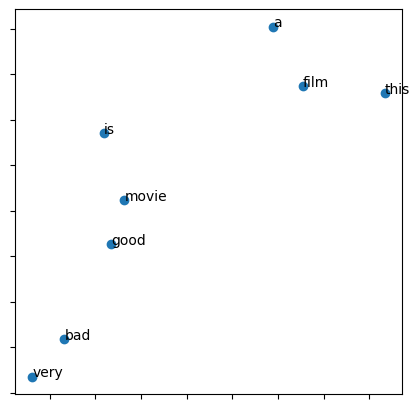

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = list(model.wv.index_to_key)
vectors = model.wv[vocabs]

tsne_model = TSNE(perplexity=2, n_components=2, init="pca", max_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(vectors)

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(vocabs):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set(yticklabels=[], xticklabels=[])
plt.show()


In [28]:
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # remove URLs
    text = re.sub(r'[^\w\s]', '', text)         # remove punctuation
    tokens = text.split()
    return tokens

corpus = [preprocess_text(review) for review in x_train]

In [29]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=corpus,
    vector_size=100,
    window=5,
    min_count=5,
    workers=4,
    epochs=10
)

model.save("imdb_word2vec.model")


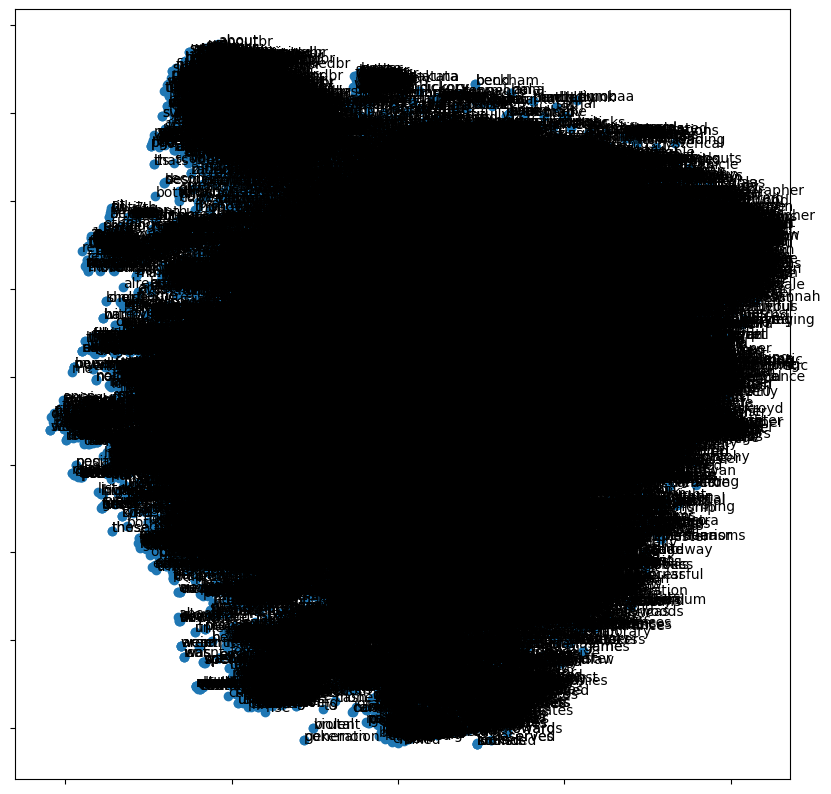

[('film', 0.9311855435371399), ('moviebr', 0.7641660571098328), ('flick', 0.7416031360626221), ('filmbr', 0.6844756603240967), ('it', 0.6708129048347473)]


In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
vectors = model.wv[words]

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", max_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(vectors)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set(yticklabels=[], xticklabels=[])
plt.show()

similar_to_movie = model.wv.most_similar("movie", topn=5)
print(similar_to_movie)


In [31]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def review_to_vec(review, model, vector_size):
    vec = np.zeros(vector_size)
    count = 0
    for word in review:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

x_train_vec = np.array([review_to_vec(r, model, 100) for r in corpus])
x_test_vec = np.array([review_to_vec(review, model, 100) for review in [preprocess_text(r) for r in x_test]])

clf = LogisticRegression(max_iter=1000)
clf.fit(x_train_vec, y_train)
y_pred = clf.predict(x_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.845
